# Red Neuronal Convolucional para Caracterizacion del comportamiento del zebrafish

Para construir nuestro modelo seguimos los siguientes pasos:

- Cargamos las imagenes de frecuencia (150x268 px) del pez cebra como dataset en formato requerido por keras. 

- Identificar las caracteristicas las cuales emplearemos en el entrenamiento del modelo.

- Useremos redes neuronales para construir nuestro modelo (arquitectura de red LeNet-5).

- El paso final sería entrenar nuestro modelo y luego probar y validar qué tan bien lo hicimos.


In [5]:
# Update libraries
!pip install seaborn==0.9.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 208 kB 773 kB/s eta 0:00:01     |██████████████████████████████  | 194 kB 773 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
#Cargamos las librerias necesarias para nuestro trabajo
import numpy as np
import cv2 as cv
import pandas as pd
import random as rd
from time import time

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras #Framework de tensorflow
import keras.layers as layers
from keras import optimizers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

In [9]:
tf.version

<module 'tensorflow_core._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v2/version/__init__.py'>

In [2]:
#Importamos nuestros datos:(Si esta en Colab.)
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


(150, 268)


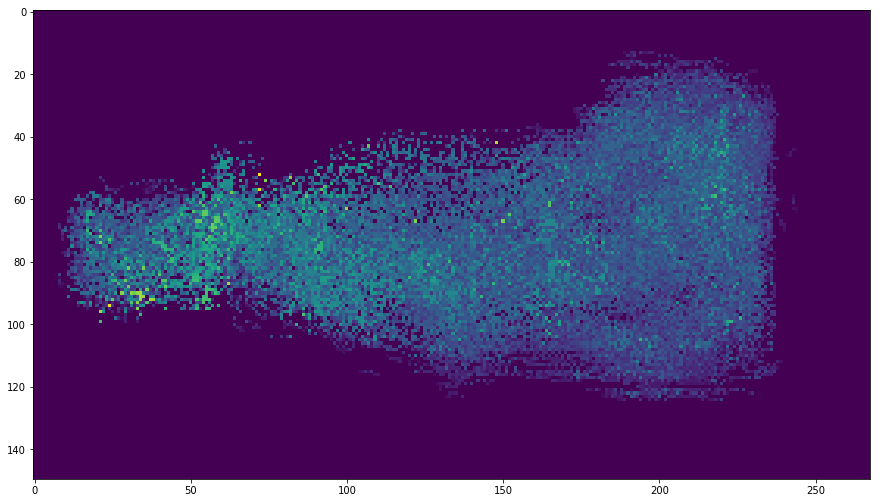

In [10]:
#Visualizamos nuestros datos (FP,FV,FA).
capa = 2
video = "100-2"
image = np.load("ImaClasificacion/capa"+str(capa)+"/"+video+".npy")
plt.figure(figsize=(15,15))
plt.imshow(image)
print(image.shape)

#'/content/drive/My Drive/ImagenesClasificacion/capa1'

In [12]:
#Ahora construimos el arreglo de datos
datos = []
labels = []

for i in range(21):
  if(i<10):
    for k in range(5):
      image1 = np.load("ImaClasificacion/capa1/10"+str(i)+"-"+str(k+1)+".npy")
      image2 = np.load("ImaClasificacion/capa2/10"+str(i)+"-"+str(k+1)+".npy")
      image3 = np.load("ImaClasificacion/capa3/10"+str(i)+"-"+str(k+1)+".npy")
      dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
      dato[:,:,0] = image1
      dato[:,:,1] = image2
      dato[:,:,2] = image3
      datos.append(dato)
      if(i<=4):
        labels.append(0)
      else:
        labels.append(1)
  else:
    for k in range(5):
      image1 = np.load("ImaClasificacion/capa1/1"+str(i)+"-"+str(k+1)+".npy")
      image2 = np.load("ImaClasificacion/capa2/1"+str(i)+"-"+str(k+1)+".npy")
      image3 = np.load("ImaClasificacion/capa3/1"+str(i)+"-"+str(k+1)+".npy")
      dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
      dato[:,:,0] = image1
      dato[:,:,1] = image2
      dato[:,:,2] = image3
      datos.append(dato)
      if(i == 10):
        labels.append(1)
      elif(i <= 16 and i >= 11):
        labels.append(2)
      else:
        labels.append(3)
for k in range(5):
  image1 = np.load("ImaClasificacion/capa1/ACL099-"+str(k+1)+".npy")
  image2 = np.load("ImaClasificacion/capa2/ACL099-"+str(k+1)+".npy")
  image3 = np.load("ImaClasificacion/capa3/ACL099-"+str(k+1)+".npy")
  dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
  dato[:,:,0] = image1
  dato[:,:,1] = image2
  dato[:,:,2] = image3
  datos.append(dato)
  labels.append(0)

datos = np.array(datos)
labels = np.array(labels)
print(datos.shape)
print(labels.shape)



(110, 150, 268, 3)
(110,)


In [13]:
print(labels.shape, datos.shape)

(110,) (110, 150, 268, 3)


In [14]:
#Ahora procedemos a partir los datos
X_train, X_test, y_train, y_test = train_test_split(datos, labels, test_size=0.4, random_state=0)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(66, 150, 268, 3) (44, 150, 268, 3) (66,) (44,)


In [16]:
print(X_test)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [ ]:
#Por ahora dejare esto aqui y me ire lentamente
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(datos)
print(loo)

for train_index, test_index in loo.split(datos):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = datos[train_index], datos[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
 # print(X_train, X_test, y_train, y_test)

LeaveOneOut()


## 3. LeNet-5 implementation

![lenet.png](https://raw.githubusercontent.com/MostafaGazar/mobile-ml/master/files/lenet.png)
>>> LeNet-5 Architecture. Credit: [LeCun et al., 1998](http://yann.lecun.com/exdb/publis/psgz/lecun-98.ps.gz)



**The following part is heavily inspired by** https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb

#### Input
    32x32x1 pixels image

#### Architecture
* **Convolutional #1** outputs 28x28x6
    * **Activation** any activation function, we will `relu`

* **Pooling #1** The output shape should be 14x14x6.

* **Convolutional #2** outputs 10x10x16.
    * **Activation** any activation function, we will `relu`

* **Pooling #2** outputs 5x5x16.
    * **Flatten** Flatten the output shape of the final pooling layer

* **Fully Connected #1** outputs 120
    * **Activation** any activation function, we will `relu`

* **Fully Connected #2** outputs 84
    * **Activation** any activation function, we will `relu`

* **Fully Connected (Logits) #3** outpute 10


In [17]:
#Primera arquitectura Lenet (2conv+2pool+3full)
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(6, 5, activation='relu')(entrada)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation='relu')(x)
x = tf.keras.layers.Dense(84, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(entrada, x)


In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 146, 264, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 132, 6)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 130, 16)       880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 65, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36400)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               436812

In [19]:
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [20]:
X_train[0].shape

(150, 268, 3)

In [ ]:
def train_generator(): 
  for i in itertools.count(X_train.shape[0]): 
    yield (X_train[i], y_train[i])
def test_generator(): 
  for i in itertools.count(X_test.shape[0]): 
    yield (X_test[i], y_test[i])

train_data = tf.data.Dataset.from_generator(train_generator, (tf.float32, tf.int64),) 
test_data = tf.data.Dataset.from_generator(test_generator, (tf.float32, tf.int64)) 

In [21]:
nepochs = 20
tam_lote = 128
history= model.fit(X_train, y_train, epochs=nepochs, batch_size=tam_lote, verbose=1 , validation_data=(X_test, y_test))

Train on 66 samples, validate on 44 samples
Epoch 1/20
66/66 [==============================] - 34s 518ms/sample - loss: 3.8231 - sparse_categorical_accuracy: 0.1970 - val_loss: 5.4294 - val_sparse_categorical_accuracy: 0.1818
Epoch 2/20
66/66 [==============================] - 7s 113ms/sample - loss: 3.7801 - sparse_categorical_accuracy: 0.3788 - val_loss: 3.8386 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/20
66/66 [==============================] - 2s 33ms/sample - loss: 2.7964 - sparse_categorical_accuracy: 0.4394 - val_loss: 2.4886 - val_sparse_categorical_accuracy: 0.3409
Epoch 4/20
66/66 [==============================] - 2s 28ms/sample - loss: 1.6628 - sparse_categorical_accuracy: 0.4545 - val_loss: 1.4035 - val_sparse_categorical_accuracy: 0.5455
Epoch 5/20
66/66 [==============================] - 2s 32ms/sample - loss: 0.9695 - sparse_categorical_accuracy: 0.6818 - val_loss: 1.0471 - val_sparse_categorical_accuracy: 0.7045
Epoch 6/20
66/66 [==============================

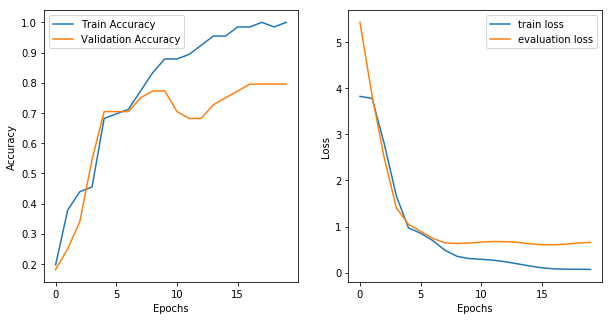

In [24]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [25]:
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

1.0 0.79545456


In [ ]:
y_predict = []
for k in range(X_test.shape[0]):
  prediccion = model.predict(np.r_[[X_test[k]]])
  mayor = prediccion[0][0]
  label = 0 
  for i in range(3):
    if(prediccion[0][i+1]>mayor):
      mayor = prediccion[0][i+1]
      label = i+1
  y_predict.append(label)

In [ ]:
y_predict = list(y_predict)

In [26]:
#Segunda arquitectura (4con + 2Pool + 2Full)
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 67, 64)        0   

In [27]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))


Train on 66 samples, validate on 44 samples
Epoch 1/70


1.0 0.8863636255264282


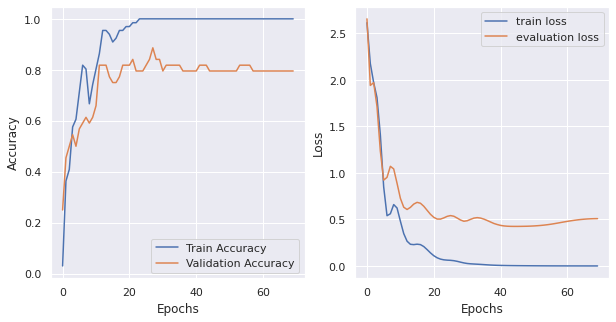

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

1.0 0.8636363744735718


In [ ]:
#Ahora saquemosle Dancing learning a esta moda

#Primero lo congelamos
model.trainable = False
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 67, 64)       

In [ ]:
#Tercera arquitectura (6convolucionales)
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 37, 67, 64)      

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))


Epoch 1/70
1/1 [==============================] - 1s 596ms/step - loss: 2.3050 - sparse_categorical_accuracy: 0.2121 - val_loss: 2.2893 - val_sparse_categorical_accuracy: 0.3182
Epoch 2/70
1/1 [==============================] - 0s 369ms/step - loss: 2.2890 - sparse_categorical_accuracy: 0.2424 - val_loss: 2.2724 - val_sparse_categorical_accuracy: 0.3864
Epoch 3/70
1/1 [==============================] - 0s 372ms/step - loss: 2.2704 - sparse_categorical_accuracy: 0.3636 - val_loss: 2.2396 - val_sparse_categorical_accuracy: 0.4773
Epoch 4/70
1/1 [==============================] - 0s 365ms/step - loss: 2.2403 - sparse_categorical_accuracy: 0.4242 - val_loss: 2.2001 - val_sparse_categorical_accuracy: 0.4318
Epoch 5/70
1/1 [==============================] - 0s 363ms/step - loss: 2.2113 - sparse_categorical_accuracy: 0.3788 - val_loss: 2.1894 - val_sparse_categorical_accuracy: 0.5000
Epoch 6/70
1/1 [==============================] - 0s 365ms/step - loss: 2.1807 - sparse_categorical_accuracy: 

0.6666666865348816 0.5909090638160706


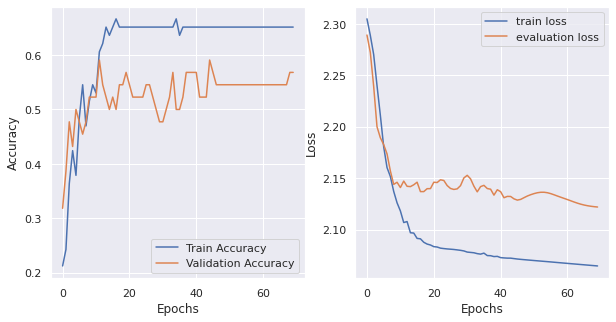

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
#Arquitectura 3
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()


Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 75, 134, 64)       36928     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 75, 134, 128)    

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 2s 2s/step - loss: 6.4677 - sparse_categorical_accuracy: 0.1970 - val_loss: 13.8810 - val_sparse_categorical_accuracy: 0.2727
Epoch 2/70
1/1 [==============================] - 1s 607ms/step - loss: 10.1027 - sparse_categorical_accuracy: 0.5000 - val_loss: 70.4341 - val_sparse_categorical_accuracy: 0.4091
Epoch 3/70
1/1 [==============================] - 1s 603ms/step - loss: 76.7023 - sparse_categorical_accuracy: 0.3182 - val_loss: 40.7751 - val_sparse_categorical_accuracy: 0.2500
Epoch 4/70
1/1 [==============================] - 1s 610ms/step - loss: 37.6777 - sparse_categorical_accuracy: 0.3333 - val_loss: 27.2692 - val_sparse_categorical_accuracy: 0.3864
Epoch 5/70
1/1 [==============================] - 1s 610ms/step - loss: 13.9420 - sparse_categorical_accuracy: 0.5606 - val_loss: 31.1367 - val_sparse_categorical_accuracy: 0.3182
Epoch 6/70
1/1 [==============================] - 1s 616ms/step - loss: 15.8345 - sparse_categorical_acc

1.0 0.75


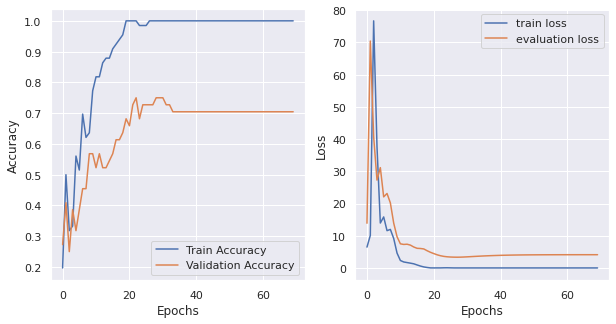

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
#Arquitectura 4
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 75, 134, 64)     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 1s 820ms/step - loss: 25.7794 - sparse_categorical_accuracy: 0.0303 - val_loss: 44.6835 - val_sparse_categorical_accuracy: 0.3182
Epoch 2/70
1/1 [==============================] - 1s 623ms/step - loss: 67.4794 - sparse_categorical_accuracy: 0.2424 - val_loss: 31.5866 - val_sparse_categorical_accuracy: 0.3409
Epoch 3/70
1/1 [==============================] - 1s 616ms/step - loss: 31.3942 - sparse_categorical_accuracy: 0.4242 - val_loss: 35.5588 - val_sparse_categorical_accuracy: 0.2727
Epoch 4/70
1/1 [==============================] - 1s 622ms/step - loss: 37.7866 - sparse_categorical_accuracy: 0.4394 - val_loss: 29.0429 - val_sparse_categorical_accuracy: 0.3864
Epoch 5/70
1/1 [==============================] - 1s 626ms/step - loss: 30.9594 - sparse_categorical_accuracy: 0.4091 - val_loss: 17.8753 - val_sparse_categorical_accuracy: 0.2727
Epoch 6/70
1/1 [==============================] - 1s 620ms/step - loss: 24.7329 - sparse_categorical

1.0 0.8409090638160706


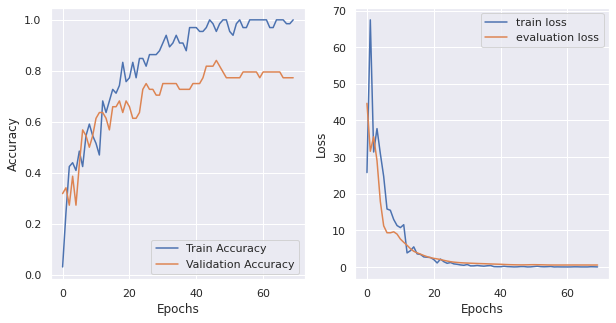

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(entrada)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 150, 268, 32)      128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 150, 268, 32)      128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 134, 32)     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 1s 1s/step - loss: 3.8709 - sparse_categorical_accuracy: 0.1212 - val_loss: 26.0558 - val_sparse_categorical_accuracy: 0.3864
Epoch 2/70
1/1 [==============================] - 1s 728ms/step - loss: 10.3509 - sparse_categorical_accuracy: 0.3182 - val_loss: 37.5858 - val_sparse_categorical_accuracy: 0.3182
Epoch 3/70
1/1 [==============================] - 1s 726ms/step - loss: 18.0834 - sparse_categorical_accuracy: 0.3939 - val_loss: 41.5177 - val_sparse_categorical_accuracy: 0.2727
Epoch 4/70
1/1 [==============================] - 1s 723ms/step - loss: 18.0987 - sparse_categorical_accuracy: 0.4545 - val_loss: 26.4593 - val_sparse_categorical_accuracy: 0.3636
Epoch 5/70
1/1 [==============================] - 1s 737ms/step - loss: 12.4662 - sparse_categorical_accuracy: 0.4697 - val_loss: 14.1801 - val_sparse_categorical_accuracy: 0.4773
Epoch 6/70
1/1 [==============================] - 1s 727ms/step - loss: 3.7800 - sparse_categorical_accu

1.0 0.5454545617103577


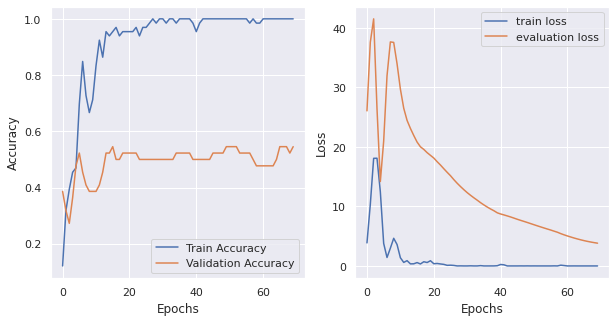

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[14,  0,  0,  0],
       [ 1,  8,  0,  1],
       [ 1,  2, 10,  0],
       [ 0,  0,  2,  5]])

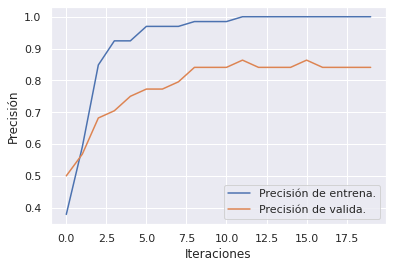

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'], label='Precisión de entrena.')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Precisión de valida.')
plt.xlabel('Iteraciones')
plt.ylabel('Precisión')
plt.legend() 
plt.savefig('presicion-modelo.jpg')

In [ ]:
#Guardamos el modelo
import h5py
model.save('LENET.h5')

In [ ]:
!sudo apt-get install libhdf5-serial-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libhdf5-serial-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 2,898 B of archives.
After this operation, 37.9 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libhdf5-serial-dev all 1.10.0-patch1+docs-4 [2,898 B]
Fetched 2,898 B in 0s (7,520 B/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libhdf5-serial-dev.
(Reading data

In [ ]:
from keras.models import load_model
new_model = load_model('LENET.h5')

TypeError: ignored

In [4]:
#Implementación VGG16
entrada = tf.keras.Input((150,268,3)) #Entrada
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same")(entrada)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(entrada, x)

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 268, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 268, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 134, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 134, 128)      73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 134, 128)      147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 67, 128)      

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
vgg16 = model.fit(X_train, y_train, batch_size=128, epochs=70, verbose=1, validation_data=(X_test, y_test), shuffle=True) 

Epoch 1/70
1/1 [==============================] - 2s 2s/step - loss: 1.3849 - acc: 0.3030 - val_loss: 149.5204 - val_acc: 0.2727
Epoch 2/70
1/1 [==============================] - 1s 633ms/step - loss: 142.0545 - acc: 0.3485 - val_loss: 1.3793 - val_acc: 0.3182
Epoch 3/70
1/1 [==============================] - 1s 636ms/step - loss: 1.3915 - acc: 0.2424 - val_loss: 1.3810 - val_acc: 0.3182
Epoch 4/70
1/1 [==============================] - 1s 639ms/step - loss: 1.3894 - acc: 0.2424 - val_loss: 1.3807 - val_acc: 0.3182
Epoch 5/70
1/1 [==============================] - 1s 632ms/step - loss: 1.3880 - acc: 0.2424 - val_loss: 1.3740 - val_acc: 0.3182
Epoch 6/70
1/1 [==============================] - 1s 630ms/step - loss: 1.3827 - acc: 0.2424 - val_loss: 1.3379 - val_acc: 0.2045
Epoch 7/70
1/1 [==============================] - 1s 626ms/step - loss: 1.3434 - acc: 0.3030 - val_loss: 2.5699 - val_acc: 0.2955
Epoch 8/70
1/1 [==============================] - 1s 627ms/step - loss: 2.6626 - acc: 0.2

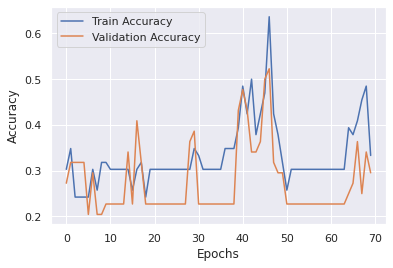

In [11]:
plt.plot(vgg16.history['acc'], label='Train Accuracy')
plt.plot(vgg16.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 

In [14]:
print(np.max(vgg16.history['acc']),np.max(vgg16.history['val_acc']))

0.6363636255264282 0.5227272510528564


In [ ]:
model.layers[22].get_config()#['name']

{'activation': 'softmax',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'predictions',
 'trainable': True,
 'units': 4,
 'use_bias': True}

In [ ]:
from keras.applications import vgg16
model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(150,268,3), pooling=None, classes=4)

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 268, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 268, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 268, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 134, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 134, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 134, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 67, 128)       0     